# ELEC 400M / EECE 571M Assignment 1: Linear models for classification
(This assignment is a modified version of an assignment used in ECE 421 at the University of Toronto and kindly made available to us by the instructor.)

In this assignment, you will be using linear models discussed in the lectures to perform a binary classification task. You will compare the performances of linear classification and logistic regression using suitable training algorithms. The implementation will be done in python using functions from the NumPy library.

## Data Set
We consider the dataset of images of letters contained in file notMNIST.npz. In particular, you will use a smaller dataset that only contains the images from two letter classes: “C” (the positive class) and “J” (the negative class). The images are of size 28 × 28 pixels. The figure below shows 20 randomly selected image samples for the letters “C” and “J”.

![](sample_images.eps)

You will apply the function `loadData` to generate the subset of images containing only letters “C” and “J”. This script organizes the total set of 3,745 images into maller subsets containing 3,500 training images, 100 validation images and 145 test images. Their use will be further specified in the problem descriptions below.

In [1]:
%reset
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
def loadData():
    with np.load('notMNIST.npz') as data:
        Data, Target = data['images'], data['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.0
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(1)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
       
    return trainData, validData, testData, trainTarget, validTarget, testTarget

## Linear Classification

The first classifier is the linear classifier 
$$\hat{y}=\mathrm{sign}\left(\sum_{i=0}^dw_ix_i\right)\,$$
where $x_0=1$ so that $b=w_0x_0$ is the bias term and $x_1,\ldots, x_d$ are the input features.
The loss function for an input-output pair $(\underline{x}_n,y_n)$ and given model parameters $\underline{w}$ is 
$$L_n(\underline{w})= \mathbf{1}\{\hat{y}_n\neq y_n\}\;.$$
The total loss for $N$ samples is 
$$L(\underline{w})= \frac{1}{N}\sum\limits_{n=1}^N\mathbf{1}\{\hat{y}_n\neq y_n\}\;.$$



### Notes on Classification
* The classification should be based on the $d=28\times 28=784$ intensity values in an image. This means that you need to flatten the 2D images to 1D input vectors $\underline{x}$ of length 784.
* The outputs $\hat{y}$ of the perceptron model are from $\{-1,+1\}$, while the target variable from the data set is from $\{0,1\}$. You need to make adjustements to account for this difference, which can include adjusting the data type.

### Loss Function [2 points]

Implement a function to compute the classification loss as defined above. The function has three input arguments: the weight vector, the feature vectors, and the labels. It returns the total loss associated with the input.

In [3]:
def ErrorRate (w, x, y):
    # Find y_cap
    y_cap = ((np.matmul(x,w))>0).astype(int)
    # Note: y_cap needs to be changed to [-1,1]
    y_cap[y_cap<1]=-1
    # Calculate Total Loss for N Samples
    loss = (((y_cap!=y).astype(float)).sum())/y.size
    return loss

### Perceptron Learning Algorithm [10 points]

Implement a function for the perceptron learning algorithm (PLA) which accepts four arguments: an inital weight vector, the data, the labels, and the maximal number of iterations it executes. It is thus a version of the PLA is assured to terminate. The function returns the updated weight vector. 

In [4]:
def PLA(w, x, y, maxIter):
    # Start PLA Loop
    while((maxIter>0)and(ErrorRate(w,x,y)>0)):
        
        # First Identify Misclassified Samples
        y_cap = ((np.matmul(x,w))>0).astype(int)
        # Note: y_cap needs to be changed to [-1,1]
        y_cap[y_cap<1]=-1
        r = (y_cap!=y).astype(int)
        
        # Pick Random Sample To Use for Weight Update
        
        # Create an Array to Store Indices of
        # misclassified samples
        s = np.zeros(r.sum())
        
        sInd = 0 #Index for s
        i = r.shape[0] #Index for Inner Loop
        while(i>0):
            i-=1
            if r[i][0]==1:
                s[sInd]=i
                sInd+=1
        
        # Pick Random Index
        rInd = int(np.random.choice(s))
        #Weight Update
        tempx = x[rInd].reshape(x[rInd].shape[0],1)
        w = np.add(w,(y[rInd][0]*(tempx)))
        
        maxIter-=1
    return w

Test the `PLA` function by training the classifier on the training data (`trainData`, `trainTarget`) with a maximum of 100 iterations, and measuring the cassification error using the testing data (`testData`, `testTarget`). Write the test script into the box below and let it print the classiciation error.

In [5]:
d = loadData()
trainData = d[0].reshape(3500,-1)
trainData = np.append(np.ones((trainData.shape[0],1)),trainData,axis=1)

validData = d[1].reshape(100,-1)
testData = d[2].reshape(145,-1)
testData = np.append(np.ones((testData.shape[0],1)),testData,axis=1)

trainTarget = d[3].astype(int)
trainTarget[trainTarget<1]=-1
validTarget = d[4].astype(int)
validTarget[validTarget<1]=-1
testTarget = d[5].astype(int)
testTarget[testTarget<1]=-1

# Training with Train Data
wPLA = PLA(np.zeros((785,1)),trainData,trainTarget,100) #Add 1 to w for bias

# Test with Test Data
EClassTest = ErrorRate(wPLA,testData,testTarget)
print("The Classification Error using the testing data is {:f} or {:f}%".format(EClassTest,EClassTest*100))

The Classification Error using the testing data is 0.027586 or 2.758621%


### Pocket algorithm [14 points]

Implement a function for the pocket algorithm which accepts three arguments: the data, the labels, and the number of iterations it executes. It should use the function `PLA` you developed above. It returns the updated weight vector.

First, briefly describe how your pocket algorithm works, and how it calls the function `PLA` above.

**Answer:**

The pocket function takes in input data (x), labels (y) and number of iterations (T) as arguments and returns weight vector $\underline{w}$. The function has been designed to implement the following algorithm.

1. Initialize weight vector, $\underline{w}$ to all zeros and also set $\underline{w}_{Pocket}$ to this.
2. While T>0
3. ---- Call the PLA function using $\underline{w}$,x and y for **one** update to get $\underline{w}_{new}$
4. ---- Calculate $E_{New}$ which is the classification error $E_{in}\left(\underline{w}_{new}\right)$
5. ---- Calculate $E_{Pocket}$ which is the classification error $E_{in}\left(\underline{w}_{Pocket}\right)$
6. ---- If $E_{New}$ < $E_{Pocket}$ **:** Update $\underline{w}_{Pocket}$ to $\underline{w}_{new}$
7. ---- Set $\underline{w}$ to $\underline{w}_{new}$ for the next iteration
8. ---- Decrement T
9. Return $\underline{w}_{Pocket}$ at the end of T iterations

The Pocket Algorithm continues to retain the "best" weight vector until there is an updated weight vector that reduces the classification error further. In case of data that is not linearly separable, PLA can keep varying between weight vectors and might not necessarily return the best. In such a scenario, running the pocket algorithm (over a large number of iterations) can at least yield the best set of weights that minimizes the classification error.

In [6]:
# Pocket Algorithm Implementation
def pocket(x, y, T):
    # Init Weight Vector
    w = np.zeros((x.shape[1],1))
    wPocket = np.copy(w)
    while(T>0):
        wNew = PLA(w,x,y,1)
        ENew = ErrorRate(wNew,x,y)
        EPocket = ErrorRate(wPocket,x,y)
        if ENew < EPocket:
            wPocket = np.copy(wNew)
        w = np.copy(wNew)
        T-=1
    return w

Test the `pocket` function by training the classifier on the training data `(trainData, trainTarget)` with 100 iterations, and measuring the cassification error using the testing data `(testData, testTarget)`. Write the test script into the box below and let it print the classiciation error.

In [7]:
# Training with Pocket Algorithm Using Train Data
wPock = pocket(trainData,trainTarget,100)

# Testing with Test Data
EClassTestPocket = ErrorRate(wPock,testData,testTarget)
print("The Classification Error using the testing data is {:f} or {:f}% (Pocket)".format(EClassTestPocket,EClassTestPocket*100))

The Classification Error using the testing data is 0.034483 or 3.448276% (Pocket)


State the test error results for the PLA and pocket algorithm that you obtained. Briefly discuss if they are as you expected and why or why not.

**Answer:**

The PLA and Pocket Algorithm were each trained using the training set for 100 iterations. The trained weights were then used to classify the test dataset. The classification errors using the test dataset are as indicated in te table below.

| Algorithm | Error (Testing Set) |
|:---------:|:-------------------:|
|    PLA    |       0.027586      |
|   Pocket  |       0.034483      |

One might've expected the Pocket algorithm to yield a better result. However,

1. Both the PLA and Pocket Algorithm (which internally calls PLA) make weight updates based on a random selection of a misclassified sample. If the pseudo random number generator is not re-seeded and the algorithms above are once again trained on the same dataset, the results will be different.


2. Considering the random selection being made, perhaps running each algorithm for more number of iterations could have illustrated the difference in behavior better.

Considering these facts, the results for this test are not all that surprising.

That said, in case of data that is not linearly separable, PLA can keep varying between weight vectors and might not necessarily return the best. In such a scenario, running the pocket algorithm (over a large number of iterations) can at least yield the best set of weights that minimizes the classification error.

## Logistic Regression

The second classifier we consider is logistic regression.  Logistic regression computes the probability measure
$$\hat{y}=\theta(\underline{w}^T\underline{x})$$
for a feature vector $\underline{x}$, where $\theta(z)=\mathrm{e}^s/(1+\mathrm{e}^s)$ is the logistic function. Given $N$ data samples $\underline{x}_n$ and labels $y_n$, the error measure for logistic regression is the binary cross-entropy loss
$$L(\underline{w})=\frac{1}{N}\sum\limits_{n=1}^N\left[-y_n\log\left(\hat{y}(\underline{x}_n)\right)-(1-y_n)\log\left(1-\hat{y}(\underline{x}_n)\right)\right]\;.$$
For the following, you will consider the regularized loss function
$$L_\lambda(\underline{w})=\frac{1}{N}\sum\limits_{n=1}^N\left[-y_n\log\left(\hat{y}(\underline{x}_n)\right)-(1-y_n)\log\left(1-\hat{y}(\underline{x}_n)\right)\right]+\frac{\lambda}{2}\|\underline{w}\|_2^2$$
with the regularization parameter $\lambda \ge 0$. 

The training of the weight vector $\underline{w}$ will be performed through batch gradient descent. 


# Loss function [3 points]

Implement a function to compute the regularized cross-entropy loss as defined above. The function has four input arguments: the weight vector, the feature vectors, the labels, and the regularization parameter. It returns the regularized loss.

In [8]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

# Regularized Cross Entropy Loss
def crossEntropyLoss(w, x, y, reg):
    theta = sigmoid(np.matmul(x,w))
    loss = ((np.matmul((np.log(theta)).T,-1.0*y).item()-np.matmul((np.log(1-theta)).T,(-1.0*y)+1).item())/y.size)+(0.5*reg*np.ndarray.item(np.matmul(w.T,w)))
    return loss

### Gradient [4 points]

Provide an analytical expression for the gradient of the regularized cross-entropy loss with respect to the weight vector.

**Answer:**

**Note:** All usage of $\log$ refer to the natural logarithm.

Given the regularized cross-entropy loss function,

$$L_\lambda(\underline{w})=\frac{1}{N}\sum\limits_{n=1}^N\left[-y_n\log\left(\hat{y}(\underline{x}_n)\right)-(1-y_n)\log\left(1-\hat{y}(\underline{x}_n)\right)\right]+\frac{\lambda}{2}\|\underline{w}\|_2^2$$

Where 

$$\hat{y}=\theta(\underline{w}^T\underline{x})$$ 

where $\theta$ represents the sigmoid function defined as, 

$$\theta\left(z\right)=\frac{\mathrm{e}^z}{(1+\mathrm{e}^z)}=\frac{1}{(1+\mathrm{e}^{-z})}$$

The gradient of  the loss function is given by,

$$\nabla L_\lambda(\underline{w})=\frac{\partial L_\lambda(\underline{w})}{\partial \underline{w}}$$

The gradient can be computed in steps with the chain rule and the following two results.

$$\frac{\text{d}\theta(\log{z})}{\text{d}z}=\frac{1}{z}\ \ \ --> Eq 1$$

$$\frac{\text{d}\theta(z)}{\text{d}z}=\theta(z)\left(1-\theta(z)\right)\ \ \ --> Eq 2$$

Proceeding to derive the Gradient,

$$\nabla L_\lambda(\underline{w})=\frac{\partial L_\lambda(\underline{w})}{\partial \underline{w}}=\frac{\partial{\left(\frac{1}{N}\sum\limits_{n=1}^N\left[-y_n\log\left(\hat{y}(\underline{x}_n)\right)-(1-y_n)\log\left(1-\hat{y}(\underline{x}_n)\right)\right]+\frac{\lambda}{2}\|\underline{w}\|_2^2\right)}}{\partial{\underline{w}}}$$

$$=\frac{\partial{\left(\frac{1}{N}\sum\limits_{n=1}^N\left[-y_n\log\left(\theta(\underline{w}^T\underline{x}_n)\right)-(1-y_n)\log\left(1-\theta(\underline{w}^T\underline{x}_n)\right)\right]+\frac{\lambda}{2}\|\underline{w}\|_2^2\right)}}{\partial{\underline{w}}}$$

$$=\frac{1}{N}\sum\limits_{n=1}^N\left[\frac{\partial{\left(-y_n\log\left(\theta(\underline{w}^T\underline{x}_n)\right)-(1-y_n)\log\left(1-\theta(\underline{w}^T\underline{x}_n)\right)\right)}}{\partial{\underline{w}}}\right]+\lambda\underline{w}$$

$$=\frac{1}{N}\sum\limits_{n=1}^N\left[-y_n\frac{\partial{\left(\log\left(\theta(\underline{w}^T\underline{x}_n)\right)\right)}}{\partial{\underline{w}}}-(1-y_n)\frac{\partial{\left(\log\left(1-\theta(\underline{w}^T\underline{x}_n)\right)\right)}}{\partial{\underline{w}}}\right]+\lambda\underline{w}$$

Applying the derivative of the log function from **Eq 1** above.

$$=\frac{1}{N}\sum\limits_{n=1}^N\left[\frac{-y_{n}}{\theta\left(\underline{w}^{T}\underline{x}_n\right)}\frac{\partial{\left(\theta\left(\underline{w}^{T}\underline{x}_n\right)\right)}}{\partial{\underline{w}}}-\frac{1-y_n}{1-\theta(\underline{w}^Tx_n)}\frac{\partial{\left(\theta\left(\underline{w}^{T}\underline{x}_n\right)\right)}}{\partial{\underline{w}}}\right]+\lambda\underline{w}$$

$$=\frac{1}{N}\sum\limits_{n=1}^N\left[\left(\frac{-y_n}{\theta\left(\underline{w}^T\underline{x}_n\right)}-\frac{1-y_n}{1-\theta\left(\underline{w}^T\underline{x}_n\right)}\right)\frac{\partial{\left(\theta\left(\underline{w}^T\underline{x}_n\right)\right)}}{\partial{\underline{w}}}\right]+\lambda\underline{w}$$

After some simplification,

$$=\frac{1}{N}\sum\limits_{n=1}^N\left[-\left(\frac{y_n-\theta\left(\underline{w}^T\underline{x}\right)}{\theta\left(\underline{w}^T\underline{x}_n\right)\left(1-\theta\left(\underline{w}^T\underline{x}_n\right)\right)}\right)\frac{\partial{\left(\theta\left(\underline{w}^T\underline{x}_n\right)\right)}}{\partial{\underline{w}}}\right]+\lambda\underline{w}$$

Applying the derivative of the sigmoid function from **Eq 2** above.

$$=\frac{1}{N}\sum\limits_{n=1}^N\left[-\left(\frac{y_n-\theta\left(\underline{w}^T\underline{x}_n\right)}{\theta\left(\underline{w}^T\underline{x}_n\right)\left(1-\theta\left(\underline{w}^T\underline{x}_n\right)\right)}\right)\left(\theta\left(\underline{w}^T\underline{x}_n\right)\left(1-\theta\left(\underline{w}^T\underline{x}_n\right)\right)\right)\frac{\partial{\left(\underline{w}^T\underline{x}_n\right)}}{\partial{\underline{w}}}\right]+\lambda\underline{w}$$

$$=\frac{1}{N}\sum\limits_{n=1}^N\left[\underline{x}_n\left(\theta\left(\underline{w}^T\underline{x}_n\right)-y_n\right)\right]+\lambda\underline{w}$$

Therefore, the analytical expression for the gradient of the regularized cross-entropy loss with respect to the weight vector is given by 

$$\nabla L_\lambda(\underline{w})=\frac{\partial L_\lambda(\underline{w})}{\partial \underline{w}}=\frac{1}{N}\sum\limits_{n=1}^N\left[\underline{x}_n\left(\theta\left(\underline{w}^T\underline{x}_n\right)-y_n\right)\right]+\lambda\underline{w}$$

Implement a function to compute the gradient. The function has four input arguments: the weight vector, the feature vectors, the labels, and the regularization parameter. It returns the gradient.

In [9]:
def gradCE(w, x, y, reg):
    theta = sigmoid(np.matmul(x,w))
    theta = theta - y
    grad = ((np.matmul(x.T,theta))/y.size)+(reg*w)
    return grad

### Gradient Descent Implementation [5 points]
Using the gradient and cross-entropy loss function above, implement the batch gradient descent algorithm. The function should accept seven arguments: the weight vector, the feature vectors, the labels, the learning rate, the number of epochs, the regularization parameter, and an error tolerance (set to $10^{-7}$ for the experiments). The error tolerance will be used to terminate the gradient descent early, if the difference (i.e., its 2-norm) between the old and updated weights after one iteration is below the error tolerance. The function should return the optimized weight vector and the learning error. 

In [10]:
def grad_descent(w, x, y, eta, iterations, reg, error_tol):
    ceLossList = list()
    # 1 - w is already initialized to 0
    # 2 - Start Loop
    while iterations>0:
        # 3 - Compute Gradient
        grad = gradCE(w,x,y,reg)
        # 4 - Set Step Direction
        stepDir = -1.0*(grad/(np.linalg.norm(grad,2)))
        wOld = np.copy(w)
        # 5 - Update Weights
        w = w + (eta*stepDir)
        # Calculate Loss
        ceLossList.append(crossEntropyLoss(w,x,y,reg))
        # Early Terminate - Tolerance Condition
        if np.linalg.norm((wOld-w),2)<error_tol:
            return w, ceLossList, iterations
        iterations-=1
    return w, ceLossList, iterations

### Tuning the Learning Rate [6 Points]: 
Write a script that excutes logistic regression using the gradient descent function from above to classify the two classes in the notMNIST dataset, loaded with the  `loadData` function. 

Set the number of epochs to $5,000$ and use the regularization parameter $\lambda=0$. 

For the learning rate, consider $\eta=5\cdot 10^{-3},\,10^{-3},\,10^{-4}$.

Train the classifier on the training data (`trainData, trainTarget`).

The script should plot the training loss as a function of the number of training epochs and output the test loss.

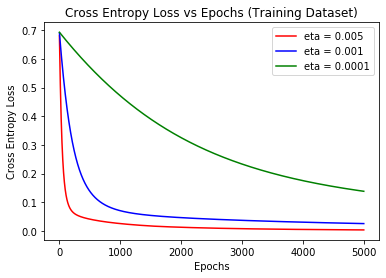

Cross Entropy Loss computed for Testing Dataset at Different Eta

For eta = 0.005, the Test Loss = 0.149644
For eta = 0.001, the Test Loss = 0.089862
For eta = 0.0001, the Test Loss = 0.146803


In [11]:
# Load Data
d2 = loadData()
trainData2 = d2[0].reshape(3500,-1)
trainData2 = np.append(np.ones((trainData2.shape[0],1)),trainData2,axis=1)

validData2 = d2[1].reshape(100,-1)
validData2 = np.append(np.ones((validData2.shape[0],1)),validData2,axis=1)

testData2 = d2[2].reshape(145,-1)
testData2 = np.append(np.ones((testData2.shape[0],1)),testData2,axis=1)

trainTarget2 = d2[3].astype(int)
validTarget2 = d2[4].astype(int)
testTarget2 = d2[5].astype(int)

# Run Batch Gradient Descent
epochs = 5000
regParam = 0 # Lambda
learningRate1 = 0.005 # eta1
learningRate2 = 0.001 # eta2
learningRate3 = 0.0001 # eta3
errTolerance = 0.0000001 # tolerance

# For Learning Rate 1
op1 = grad_descent(np.zeros((trainData2.shape[1],1)),trainData2,trainTarget2,learningRate1,epochs,regParam,errTolerance)

# For Learning Rate 2
op2 = grad_descent(np.zeros((trainData2.shape[1],1)),trainData2,trainTarget2,learningRate2,epochs,regParam,errTolerance)

# For Learning Rate 3
op3 = grad_descent(np.zeros((trainData2.shape[1],1)),trainData2,trainTarget2,learningRate3,epochs,regParam,errTolerance)

# Plots and Outputs
plt.plot(op1[1],"-r",label="eta = 0.005")
plt.plot(op2[1],"-b",label="eta = 0.001")
plt.plot(op3[1],"-g",label="eta = 0.0001")
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend(loc="upper right")
plt.title("Cross Entropy Loss vs Epochs (Training Dataset)")
plt.show()

# Compute Loss With Test Data

# With Eta = 0.005
ceLossEta1 = crossEntropyLoss(op1[0],testData2,testTarget2,regParam)

# With Eta = 0.001
ceLossEta2 = crossEntropyLoss(op2[0],testData2,testTarget2,regParam)

# With Eta = 0.0001
ceLossEta3 = crossEntropyLoss(op3[0],testData2,testTarget2,regParam)

print("Cross Entropy Loss computed for Testing Dataset at Different Eta\n")
print("For eta = 0.005, the Test Loss = {:f}".format(ceLossEta1))
print("For eta = 0.001, the Test Loss = {:f}".format(ceLossEta2))
print("For eta = 0.0001, the Test Loss = {:f}".format(ceLossEta3))

Briefly discuss the impact of $\eta$ on the training time. 

**Answer:**

$\eta$ represents the step size in the gradient descent algorithm. As can be seen from the graph above, a larger step size has been helpful in quickly getting closer to the minimum of the cross-entropy loss function. At then end of 5000 iterations, none of the three curves seem to have gotten to 0 loss yet. However, judging by the trend of the three curves, one can appreciate the fact that a lower value of $\eta$ results in a slower descent thereby prolonging the training time. For this data set, it would be efficient to pick $\eta=0.005$.

In general though, having either a very high or very low value of $\eta$ may not be helpful.

1. **Very Small** $\eta$ : As seen in the experiment in the prior section, a very low value of $\eta$ can prolong training if the starting point (depends on how weights are initialized) is very far away from the minimum.


2. **Very Large** $\eta$ : This can prove detrimental when close to the minimum. That is, a large $\eta$ can lead to the situation where one keeps overshooting and missing the minimum at every step.

The best choice would then be to have a dynamic $\eta$ which is large at the start but decays as the number of steps increase.

### Generalization [3 points]:
Fix the learning rate to $\eta=0.005$, and consider values for the regularization parameter $\lambda = 0.001,\, 0.01,\, 0.1$. Measure the validation and test losses and state them in your answer below. Comment on the effect of regularization on performance as well as the rationale behind tuning $\eta$ using the validation set.

**Answer:**

**Note:** There is a mistake in this question. The last sentence should be "*Comment on the effect of regularization on performance as well as the rationale behind tuning  $\lambda$ using the validation set.*". As discussed on Piazza (https://piazza.com/class/k536rind5166p6?cid=48)

For a fixed step size, $\eta=0.005$. The validation and test losses have been tabulated at different values of the regularization parameter, $\lambda$.

|           |              |    Cross-Entropy  Loss      |          |
|:---------:|:------------:|:--------------:|:--------:|
| $\lambda$ | Training Set | Validation Set | Test Set |
|     0     |   0.003820   |    0.173047    | 0.150299 |
|   0.001   |   0.033632   |    0.107379    | 0.099225 |
|    0.01   |   0.060219   |    0.105983    | 0.100137 |
|    0.1    |   0.113885   |    0.145799    | 0.135534 |

**Effect of $\lambda$ on Performance:**

The regularization parameter, $\lambda$ is used to control overfitting. 

As can be seen in the table above at $\lambda=0$, the model has a very low training error but a very high test error which indicates overfitting. Likewise, a higher value ($\lambda=0.1$) has resulted in hight training as well as test errors.

The best choice of $\lambda$ seems to be a very small non-zero value. In the case above, $0.001$ and $0.01$ seem to be good choices for $\lambda$. [the differences in errors between $\lambda=0.001$ and $\lambda=0.01$ are $\triangle E_{Valid}=0.0013$ and $\triangle E_{Test}=0.000912$]

**Need for a Validation Set:**

The validation set is a portion of the original dataset that is kept aside just like the test set. The validation set is similar to the test set in that neither is used to train the model and both are used to estimate the out-of-sample error. They differ in the fact that the validation set is still used to tune hyper parameters (like $\lambda$) that affect the model.

The training process invloves selection of different hyperparameters. Since the validation set was not itself used to train the model, it can serve as an unbiased way to measure the effectiveness of different combinations of hyperparameters. That is, one can train the model independently using different combinations of hyperparameters (say different $\lambda$) and then evaluate the performance of each combination using the validation set. This way, the best set of hyperparameters can be chosen.

Finally, the test set can be used to evaluate the fully trained model (with appropriately chosen hyperparameters) to get a sense of how well the model generalizes. In addition, the test set can also serve as a basis of comparison for different models.